In [3]:
#standard
import random
import datetime as dt


#nonstandard
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# functions
def im2dec(arr):
    """takes in an n-by-8 array of 16-bit compressed representation of 2ds pixels and returns an n-by-128 array 
    of the expanded visual field
    """
    def dec2binarr(arr):
        return np.array(list(''.join([bin(int(i))[2:].zfill(16) for i in arr]))).astype(int)
    
    assert arr.shape[1] == 8
    return np.array([dec2binarr(i) for i in arr])


bananas


18637


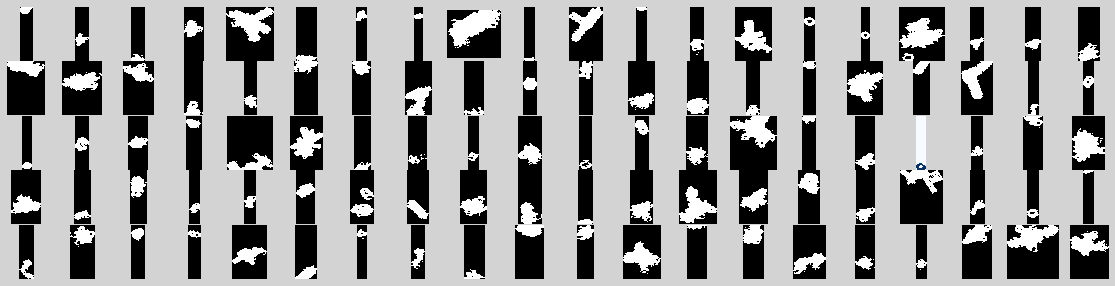

In [33]:
def plot_random_from_flight(flight_name, start_time, end_time, ax=[], size_lim=0, 
                            apply_UW_filter=True, color_by_class=True):
    if len(ax)==0:
        fig, axg = plt.subplots(nrows=5, ncols=20, figsize=(20,5))
        ax = axg.flatten()
        plt.subplots_adjust(wspace=0.05, hspace=0.01)
        fig.patch.set_facecolor('lightgrey')
    flight_file = f'/home/disk/eos9/jfinlon/socrates/{flight_name.lower()}/pbp.{flight_name.lower()}.2DS.H.nc'
    probe_file = f'/home/disk/eos9/jfinlon/socrates/{flight_name.lower()}/img.{flight_name.lower()}.2DS.H.nc'
    class_file = f'/home/disk/eos9/jkcm/Data/particle/classified/UW_particle_classifications.{flight_name.lower()}.nc'
    probe_data = xr.open_dataset(probe_file)
    flight_data = xr.open_dataset(flight_file)
    class_data = xr.open_dataset(class_file)
    assert(len(class_data.time) == len(flight_data.time))
    data = xr.merge([flight_data, class_data])
    data = data.set_coords(['datetime'])
    data_subs = data.isel(time=np.logical_and(data.datetime>np.datetime64(start_time), data.datetime<np.datetime64(end_time)))
    if size_lim:
        data_subs = data_subs.where(data_subs.image_area>=size_lim, drop=True)
    if apply_UW_filter:
        data_subs = data_subs.where(data_subs.UW_flag==0, drop=True)
    
    for axi in ax:
        axi.axis('off')

    print(len(data_subs.time))
    random_selection = np.random.choice(data_subs.time, len(ax))
    for next_particle, axi in zip(random_selection, ax):
#         print(data_subs.UW_phase[next_particle].values)
        if color_by_class:
            color = 'Greys' if data_subs.UW_phase[next_particle].values == 0 else 'Blues_r'         
        else:
            color='Greys'
        particle_frame = int(data_subs.parent_rec_num[next_particle].values)
        time = data_subs.datetime[next_particle].values
        [slice_start, slice_end] = data_subs.position[next_particle].values.astype(int)
        image_data = probe_data['data'].isel(time=particle_frame-1, ImgBlocklen=slice(slice_start-1, slice_end)).values
        axi.imshow(~im2dec(image_data).T, cmap=color)
        
    return 

plot_random_from_flight( 'rf01', 
                        start_time=dt.datetime(2018, 1, 16, 4) + dt.timedelta(hours=0.42), 
                        end_time=dt.datetime(2018, 1, 16, 4) + dt.timedelta(hours=0.46),
                        size_lim=0.02, apply_UW_filter=True, color_by_class=True)

# plot_random_from_flight( 'rf03', 
#                         start_time=dt.datetime(2018, 1, 22, 22) + dt.timedelta(hours=0.3), 
#                         end_time=dt.datetime(2018, 1, 22, 22) + dt.timedelta(hours=0.5),
#                         size_lim=0.07, apply_UW_filter=True, color_by_class=True)

# plot_random_from_flight('rf05', 
#                         start_time=dt.datetime(2018, 1, 26, 4) + dt.timedelta(hours=0.85), 
#                         end_time=dt.datetime(2018, 1, 26, 4) + dt.timedelta(hours=0.91), 
#                         size_lim=0.07, apply_UW_filter=True, color_by_class=True)

3901


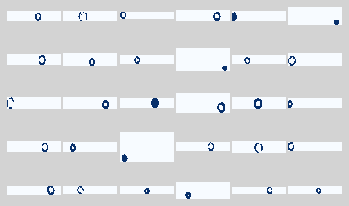

In [153]:
plot_random_from_flight('rf05', 
                        start_time=dt.datetime(2018, 1, 26, 4) + dt.timedelta(hours=0.85), 
                        end_time=dt.datetime(2018, 1, 26, 4) + dt.timedelta(hours=0.9), 
                        size_lim=0.01, apply_UW_filter=True, color_by_class=True)

In [4]:
start_time=dt.datetime(2018, 1, 22, 22) + dt.timedelta(hours=0.3)
end_time=dt.datetime(2018, 1, 22, 22) + dt.timedelta(hours=0.5)
flight_name='rf03'
class_file = f'/home/disk/eos9/jkcm/Data/particle/classified/UW_particle_classifications.{flight_name.lower()}.nc'
flight_file = f'/home/disk/eos9/jfinlon/socrates/{flight_name.lower()}/proc2DS_H.{flight_name.lower()}.nc'
flight_data = xr.open_dataset(flight_file)
class_data = xr.open_dataset(class_file)
data = xr.merge([flight_data, class_data])

data_subs = data.isel(time=np.logical_and(data.datetime>np.datetime64(start_time), data.datetime<np.datetime64(end_time)))

In [5]:
data_subs_01 =  data_subs.where(data_subs.image_area<=0.025, drop=True)
data_subs_01 =  data_subs_01.where(data_subs_01.image_area>=0.01, drop=True)

data_subs_02 =  data_subs.where(data_subs.image_area<=0.01, drop=True)

In [13]:
# size_ranges = np.arange(0, 0.1, 0.01)
frac = np.empty_like(np.arange(10))
pctiles = np.empty_like(frac)
# for i,s in enumerate(size_ranges[:-1]):

    data_subs_01 =  data_subs.where(data_subs.image_area>=s, drop=True)
    data_subs_01 =  data_subs_01.where(data_subs_01.image_area<=size_ranges[i+1], drop=True)
    frac[i] = np.sum(data_subs_01.UW_phase==1)/np.sum(~np.isnan(data_subs_01.UW_phase))



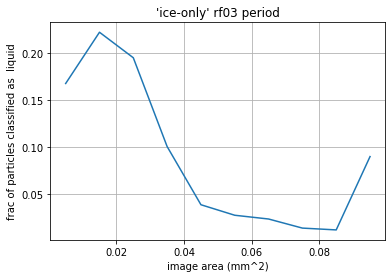

In [25]:
plt.plot(size_ranges+0.005, frac)
plt.ylabel("frac of particles classified as  liquid")
plt.xlabel("image area (mm^2)")
plt.title("'ice-only' rf03 period")
plt.grid(True);

In [6]:
print(np.sum(data_subs.UW_phase==1)/np.sum(~np.isnan(data_subs.UW_phase)))
np.sum(data_subs.UW_phase==0)/np.sum(~np.isnan(data_subs.UW_phase))

<xarray.DataArray 'UW_phase' ()>
array(0.11775537)


<xarray.DataArray 'UW_phase' ()>
array(0.88224463)

In [7]:
print(np.sum(data_subs.UW_phase==1)/np.sum(~np.isnan(data_subs.UW_phase)))
np.sum(data_subs.UW_phase==0)/np.sum(~np.isnan(data_subs.UW_phase))

<xarray.DataArray 'UW_phase' ()>
array(0.11775537)


<xarray.DataArray 'UW_phase' ()>
array(0.88224463)

In [8]:
print(np.sum(data_subs_02.UW_phase==1)/np.sum(~np.isnan(data_subs_02.UW_phase)))
np.sum(data_subs_02.UW_phase==0)/np.sum(~np.isnan(data_subs_02.UW_phase))

<xarray.DataArray 'UW_phase' ()>
array(0.16777308)


<xarray.DataArray 'UW_phase' ()>
array(0.83222692)

In [9]:

flight_name = 'rf05'
flight_file = f'/home/disk/eos9/jfinlon/socrates/{flight_name.lower()}/pbp.{flight_name.lower()}.2DS.H.nc'
flight_data = xr.open_dataset(flight_file)
# df = flight_data.to_dataframe()
    

In [ ]:
flight_data.isel(time=slice(0, -1, 1000)).to_dataframe()